<a href="https://colab.research.google.com/github/JEN12H/PYTORCH/blob/main/PYTORCH-ANN/SIMPLE_ANN_USING_PYTORCH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import pandas as pd
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset,DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
# SETTING SEED VALUE
torch.manual_seed(42)

In [3]:
df = pd.read_csv('/content/fmnist_small.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


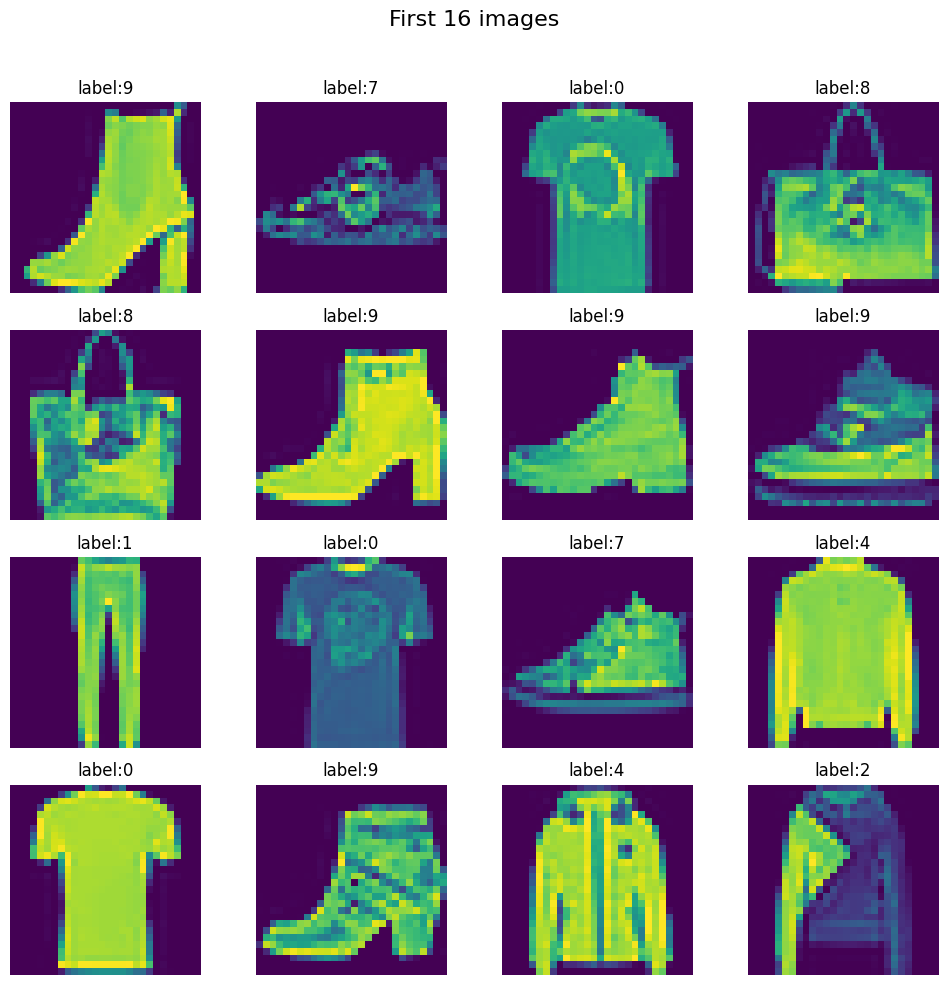

In [6]:
fig,axes = plt.subplots(4,4,figsize=(10,10))
fig.suptitle("First 16 images",fontsize = 16)
for i,ax in enumerate(axes.flat):
  img = df.iloc[i,1:].values.reshape(28,28)
  ax.imshow(img)
  ax.axis('off')
  ax.set_title(f"label:{df.iloc[i,0]}")
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

In [7]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
X_train = X_train/255.0 # values in range of 0 TO 1
X_test = X_test/255.0

In [10]:
# CREATING OUR CUSTOM DATASET CLASS
class CustomDataset(Dataset):

  def __init__(self,features,labels):
    self.features = torch.tensor(features,dtype=torch.float32)
    self.labels = torch.tensor(labels,dtype=torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self,index):
    return self.features[index],self.labels[index]


In [11]:
#SPLITTING OUR DATASET
train_dataset = CustomDataset(X_train,y_train)
test_dataset = CustomDataset(X_test,y_test)


In [13]:
train_loader = DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader = DataLoader(test_dataset,batch_size=32,shuffle=False)

In [18]:
# DEFINING NEURAL NETWORK CLASS
class MyNN(nn.Module):

  def __init__(self,num_features):
    super().__init__()
    self.model = nn.Sequential(
    nn.Linear(num_features,128),
    nn.ReLU(),
    nn.Linear(128,64), # 128 CONNECTIONS INCOMING AND 64 OUTGOING
    nn.ReLU(),
    nn.Linear(64,10),
    )
  def forward(self,x):
    return self.model(x)


In [19]:
epochs = 100
learning_rate = 0.1

In [20]:
#INSTANTIATE OUR MODEL
model = MyNN(X_train.shape[1])
#loss Function
criterion = nn.CrossEntropyLoss()
#optimizer
optimizer = optim.SGD(model.parameters(),lr = learning_rate)

In [21]:
# TRAINING OUR MODEL
for epoch in range(epochs):
  per_epoch_loss = 0
  for batch_features,batch_labels in train_loader:
    # FORWARD PASS
    outputs = model(batch_features)
    #CALCUALTING LOSS
    loss = criterion(outputs,batch_labels)
    # CLEARING GRADIENTS
    optimizer.zero_grad()
    loss.backward()
    # UPDATE GRADS
    optimizer.step()
    per_epoch_loss = per_epoch_loss + loss.item()
  avg_loss = per_epoch_loss/len(train_loader)
  print(f"EPOCH:{epoch+1}/{epochs} LOSS:{avg_loss:.4f}")

EPOCH:1/100 LOSS:1.3216
EPOCH:2/100 LOSS:0.7793
EPOCH:3/100 LOSS:0.6428
EPOCH:4/100 LOSS:0.5752
EPOCH:5/100 LOSS:0.5282
EPOCH:6/100 LOSS:0.4953
EPOCH:7/100 LOSS:0.4602
EPOCH:8/100 LOSS:0.4359
EPOCH:9/100 LOSS:0.4183
EPOCH:10/100 LOSS:0.3984
EPOCH:11/100 LOSS:0.3850
EPOCH:12/100 LOSS:0.3723
EPOCH:13/100 LOSS:0.3477
EPOCH:14/100 LOSS:0.3467
EPOCH:15/100 LOSS:0.3139
EPOCH:16/100 LOSS:0.3126
EPOCH:17/100 LOSS:0.2955
EPOCH:18/100 LOSS:0.2857
EPOCH:19/100 LOSS:0.2708
EPOCH:20/100 LOSS:0.2624
EPOCH:21/100 LOSS:0.2576
EPOCH:22/100 LOSS:0.2423
EPOCH:23/100 LOSS:0.2396
EPOCH:24/100 LOSS:0.2261
EPOCH:25/100 LOSS:0.2234
EPOCH:26/100 LOSS:0.2117
EPOCH:27/100 LOSS:0.2191
EPOCH:28/100 LOSS:0.2110
EPOCH:29/100 LOSS:0.1816
EPOCH:30/100 LOSS:0.1889
EPOCH:31/100 LOSS:0.1912
EPOCH:32/100 LOSS:0.1915
EPOCH:33/100 LOSS:0.1759
EPOCH:34/100 LOSS:0.1779
EPOCH:35/100 LOSS:0.1577
EPOCH:36/100 LOSS:0.1668
EPOCH:37/100 LOSS:0.1553
EPOCH:38/100 LOSS:0.1443
EPOCH:39/100 LOSS:0.1442
EPOCH:40/100 LOSS:0.1329
EPOCH:41/

In [22]:
# EVALUATION OF MODEL
model.eval()
total = 0
correct = 0
with torch.no_grad():
  for batch_features,batch_labels in test_loader:
    outputs = model(batch_features)
    _, predicted = torch.max(outputs,1)
    total = total + batch_labels.shape[0]
    correct = correct + (predicted == batch_labels).sum().item()
print(correct/total)

0.8325
